In [10]:
import pandas as pd
import numpy as np

import multiprocessing as mp

In [57]:
% matplotlib inline

In [6]:
d = {
    'a':[1,2,3,4,5,6],
    'b':[8,9,0,1,2,3],
    'ind':list('abcdef')
}

df = pd.DataFrame(d).set_index('ind')
df

,a,b
ind,,
a,1,8
b,2,9
c,3,0
d,4,1
e,5,2
f,6,3


In [9]:
np.split(df, 2)[0].head()

,a,b
ind,,
a,1,8
b,2,9
c,3,0


In [38]:
def parallel_apply(df, f):
    n = mp.cpu_count()-1
    with mp.Pool() as pool:
        output_dfs = pool.map(f, np.array_split(df, n))
        
    return pd.concat(output_dfs)

In [39]:
import sklearn.datasets
from pprint import pprint

In [40]:
d = sklearn.datasets.load_boston()

In [41]:
df = pd.DataFrame(d['data'],columns=d['feature_names'])

In [42]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
%timeit df.apply(lambda x: x**2)

1000 loops, best of 3: 1.64 ms per loop


In [46]:
def square(x):
    return x**2

%timeit parallel_apply(df, square)

10 loops, best of 3: 130 ms per loop


In [163]:
df = pd.DataFrame(np.random.uniform(0, 1e3, size=int(1e6)))

In [164]:
len(df)

1000000

In [165]:
len(df.dropna())

1000000

In [166]:
df.applymap(largest_prime)

KeyboardInterrupt: 

In [ ]:
%timeit df.applymap(largest_prime)

1 loop, best of 3: 3min 51s per loop


In [ ]:
%timeit parallel_apply(df, df_lp)

In [54]:
np.random.exponential(scale=1e6, size=5)

array([ 1199881.17034619,  1888855.10216908,  1249728.66889318,
        5288778.09907145,  1044930.88051399])

In [69]:
df = pd.DataFrame(np.random.exponential(scale=2, size=10000000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13ea6ef28>]], dtype=object)

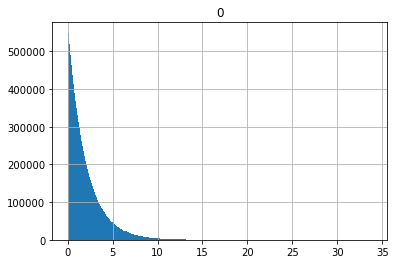

In [70]:
df.hist(bins=300)

In [153]:
def df_lp(df):
    return df.applymap(largest_prime)


def largest_prime(n):
    
    if n < 2:
        return 0
    A = range(2, int(n)+1)
    B = []
    C = list(A)
    while C[0] < np.sqrt(n): #Condition
        firstElement= C[0]
        B+= [firstElement] #The first number in the list is a prime number. Write this number a list of primes, B.
        C= [x for x in C if x%firstElement!=0] #We use comprehension List to filter multiplies using
    return max(B+C) #The numbers in the B list and those left in List A are all primes searched.

In [131]:
print(largest_prime([1,2,3,4,5,6,7,8]))

[0 2 3 4 5 5 7 7]


In [123]:
np.floor(0)

0.0

In [134]:
np.sqrt(-1)

nan

In [136]:
np.sqrt(np.pi)

1.7724538509055159

In [139]:
[1 for x in 3]

TypeError: 'int' object is not iterable

In [145]:
np.isreal([1,3,4,5])

array([ True,  True,  True,  True], dtype=bool)